In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
import requests

url = "https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/839/original/Jamboree_Admission.csv"
response = requests.get(url)

with open("Jamboree_Admission.csv", "wb") as file:
    file.write(response.content)

print("File downloaded successfully!")


File downloaded successfully!


In [3]:
df=pd.read_csv('/content/Jamboree_Admission.csv')
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [4]:
df.shape

(500, 9)

In [5]:
df=df.drop(columns=['Serial No.'])

In [6]:
df.shape

(500, 8)

In [7]:
df.describe()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


In [8]:
df.nunique()

,0
GRE Score,49
TOEFL Score,29
University Rating,5
SOP,9
LOR,9
CGPA,184
Research,2
Chance of Admit,61


Conclusion:-

University Rating SOP LOR Research can be considered as categories .

In [9]:
df.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


In [10]:
df.isnull().sum()

,0
GRE Score,0
TOEFL Score,0
University Rating,0
SOP,0
LOR,0
CGPA,0
Research,0
Chance of Admit,0


COnclusion:-

There is no NULL Values in the DataSet

In [11]:
col=df.columns
col

Index(['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA',
       'Research', 'Chance of Admit '],
      dtype='object')

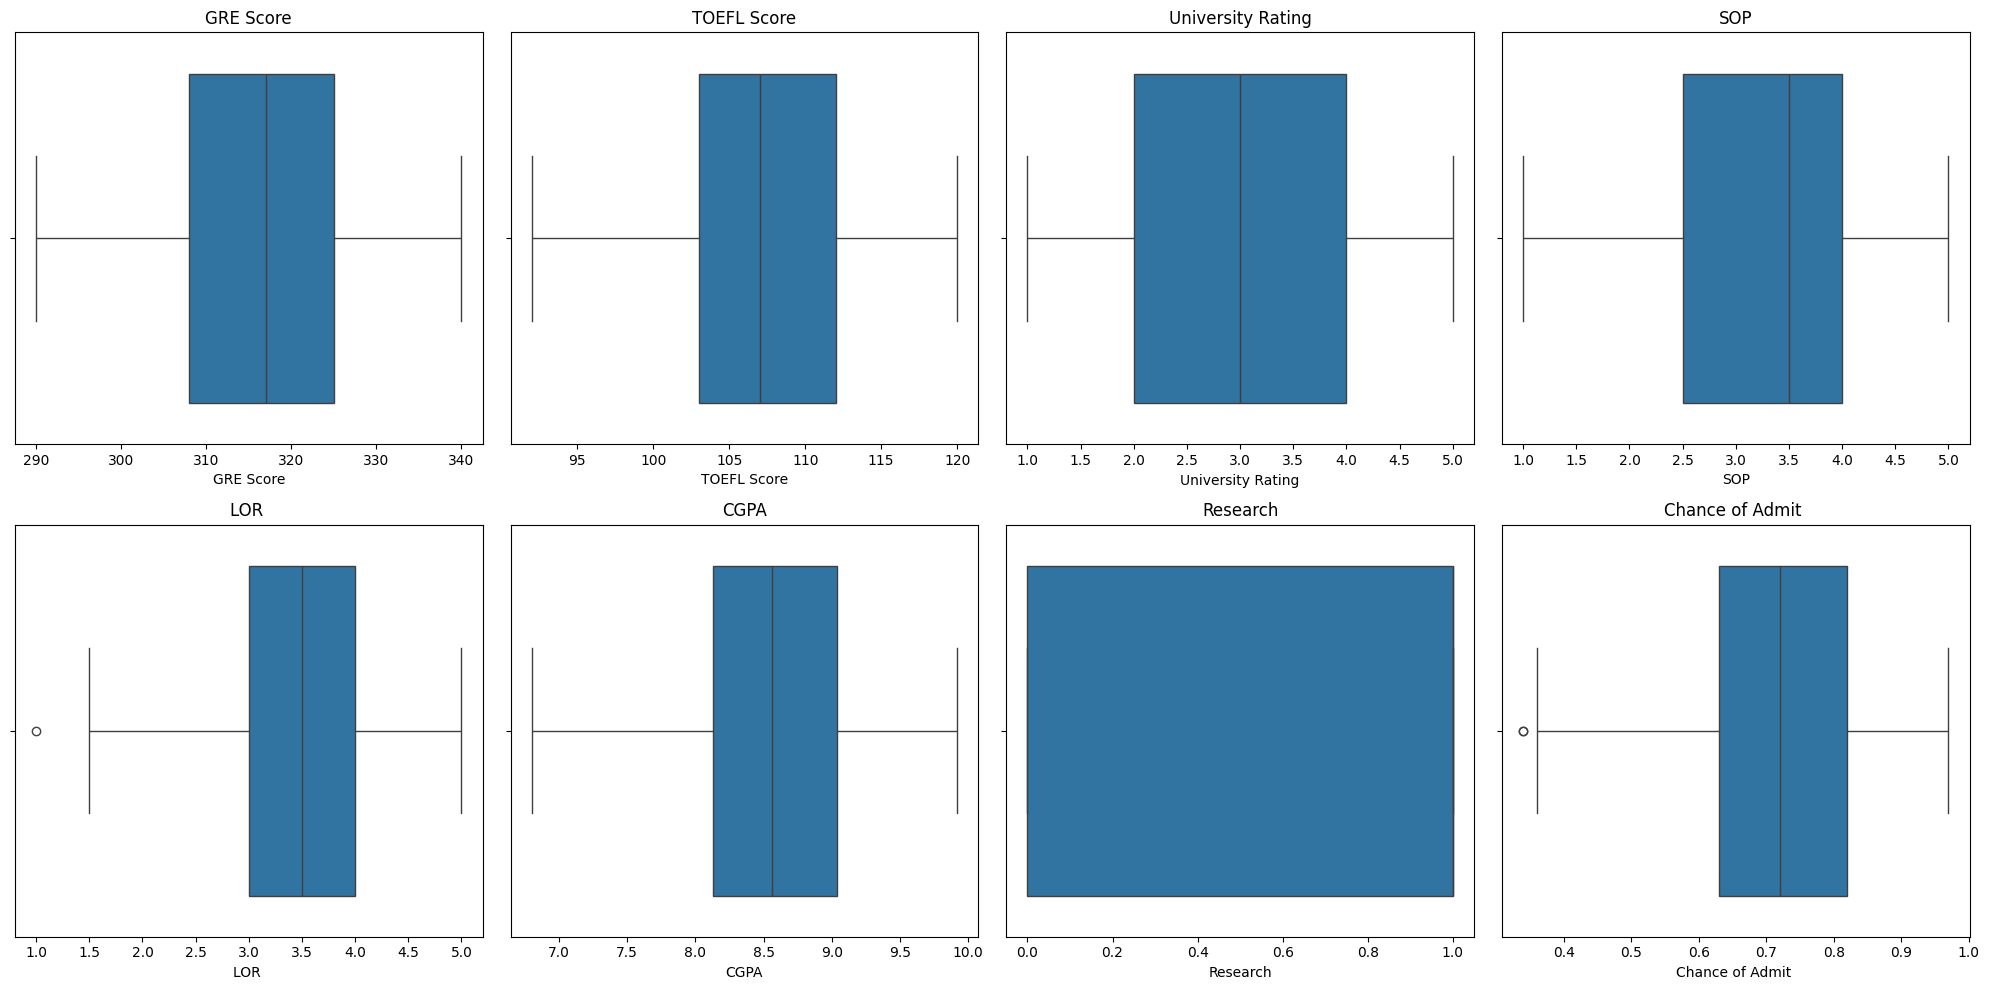

In [12]:
count = 1
plt.figure(figsize=(20, 10)) # figure size to of subplots
num_cols = len(col)
num_rows = (num_cols + 3) // 4

for i in range (num_cols):
    plt.subplot(num_rows, 4, count)
    sns.boxplot(x=df[col[i]]) # Specify x-axis for boxplot
    plt.title(col[i])
    count += 1

plt.tight_layout()
plt.show()

Conclusion:-

There is no Outliers in DataSet as we can see from the Box Plot

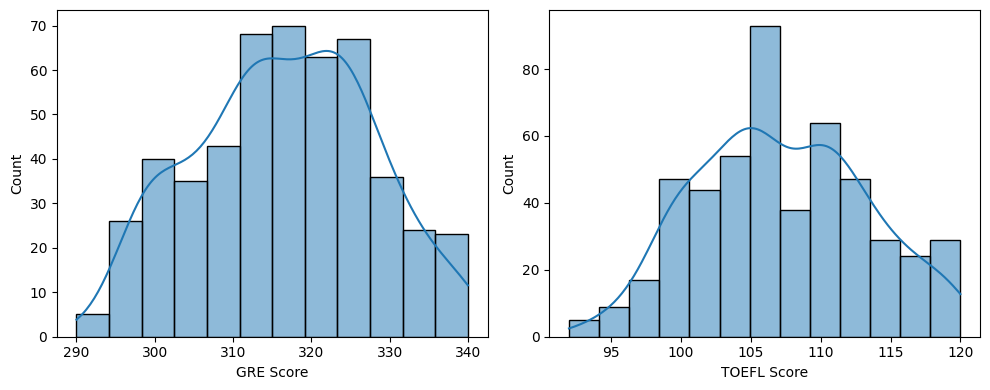

In [13]:
snsfig, axs = plt.subplots(1, 2, figsize=(10, 4))

sns.histplot(df['GRE Score'],ax=axs[0],kde=True)

sns.histplot(df['TOEFL Score'],ax=axs[1],kde=True)

plt.tight_layout()
plt.show()

** GRE Score Distribution (Left Plot)**
The distribution is approximately normal (bell-shaped).

Most students have GRE scores clustered between 310 and 325.

There's a slight left skew (a few lower scores around 290–300).

Very few students have very low (<300) or very high (>335) scores.

Conclusion: GRE scores are fairly consistent across the applicants, centered around ~315–320. This suggests a relatively competitive applicant pool.

**   TOEFL Score Distribution (Right Plot)**

Also roughly bell-shaped, but with a slight right skew.

Most scores are concentrated between 100 and 115.

Fewer students score below 95 or above 118.

The distribution is slightly more spread out than GRE.

Both GRE and TOEFL scores follow a near-normal distribution, which is good for applying statistical or regression models.

GRE scores are slightly tighter and more centralized, while TOEFL scores are more dispersed.



In [14]:
df

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...
495,332,108,5,4.5,4.0,9.02,1,0.87
496,337,117,5,5.0,5.0,9.87,1,0.96
497,330,120,5,4.5,5.0,9.56,1,0.93
498,312,103,4,4.0,5.0,8.43,0,0.73


In [15]:

cols=['GRE Score', 'TOEFL Score','CGPA',]

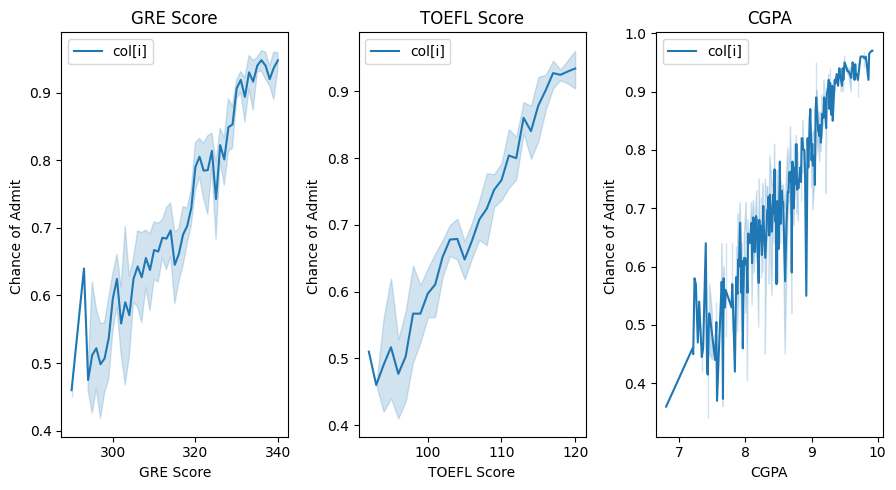

In [ ]:
count = 1
plt.figure(figsize=(12, 5)) # figure size to of subplots
num_cols = len(cols)
num_rows = (num_cols + 3) // 4

for i in range (num_cols):
    plt.subplot(num_rows, 4, count)
    sns.lineplot(data=df,x=cols[i],y='Chance of Admit ',label='col[i]')
    plt.title(cols[i])
    count += 1

plt.tight_layout()
plt.show()

1. GRE Score vs Chance of Admit
Positive correlation: As GRE score increases, the chance of admission also increases.

The rise is gradual up to ~320, and then steeper after 320.

Students with GRE > 330 almost always have a >90% chance of admission.

 Conclusion: GRE score significantly impacts admission, especially for high scorers (>320).

2. TOEFL Score vs Chance of Admit
Also shows a positive linear trend.

Slightly more noise/variance at low TOEFL scores, but overall upward trend.

Candidates with TOEFL scores above 110 generally have >85% chance of admission.

Conclusion: TOEFL score has a clear influence on admissions but is slightly less consistent than GRE.

 3. CGPA vs Chance of Admit
Strongest positive correlation observed.

The line is very steep: as CGPA increases, chance of admit increases sharply.

CGPA above 9.0 almost guarantees >90% chance of admit.

Narrow confidence band → high model confidence in this trend.

Conclusion: CGPA is the most influential predictor among the three shown. It has a very tight and consistent relationship with admission probability.



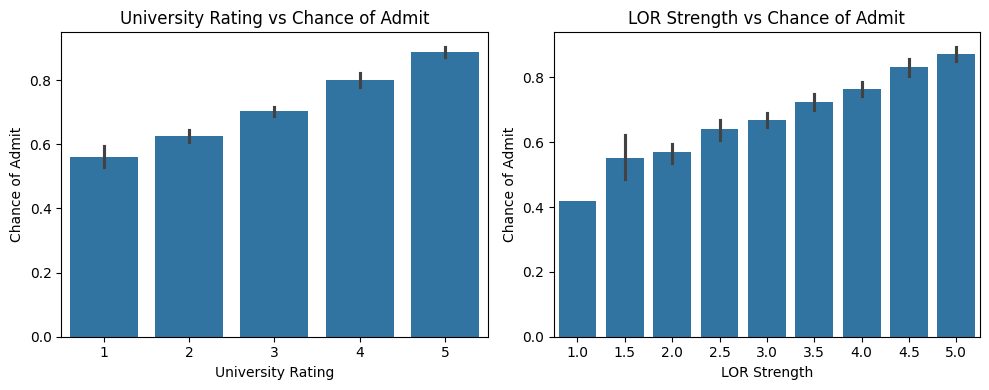

In [16]:
fig, axs = plt.subplots(1, 2, figsize=(10, 4))

sns.barplot(data=df,x='University Rating',y='Chance of Admit ',ax=axs[0])
axs[0].set_title('University Rating vs Chance of Admit')
axs[0].set_xlabel('University Rating')
axs[0].set_ylabel('Chance of Admit')

sns.barplot(data=df,x='LOR ',y='Chance of Admit ',ax=axs[1])
axs[1].set_title('LOR Strength vs Chance of Admit')
axs[1].set_xlabel('LOR Strength')
axs[1].set_ylabel('Chance of Admit')


plt.tight_layout()
plt.show()

Conclusion:-

University reputation plays a moderate but consistent role in improving the admission chances.


A strong recommendation letter significantly boosts admission chances. It has strong predictive power in the model.

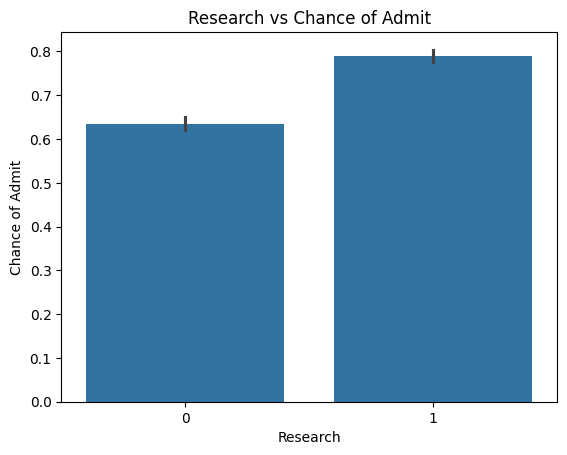

In [17]:
sns.barplot(data=df,x='Research',y='Chance of Admit ')
plt.title('Research vs Chance of Admit')
plt.xlabel('Research')
plt.ylabel('Chance of Admit')
plt.show()

Conclusion:-

Having research experience significantly improves the chance of admission. On average, candidates with research are ~17% more likely to be admitted compared to those without.



# TRAINING AND OBSERVATION OF MODEL

In [18]:
X = df.drop(columns=['Chance of Admit '])
y= df['Chance of Admit ']

Splitting the dataset into features (X) and target (y) for machine learning or statistical modeling.

In [19]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

Now, Splitting the dataset into train (80%) and test (20%)

In [20]:
from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler()
# X_train_scaled = scaler.fit_transform(X_train)
# X_test_scaled = scaler.transform(X_test)

Performing Standarization on train dataset of both X and y

In [21]:
from sklearn.linear_model import LinearRegression
# model = LinearRegression()
# model.fit(X_train_scaled, y_train)

Started the Linear Rege=ression Model

In [ ]:
# predictions_train = model.predict(X_train_scaled)
# predictions_test = model.predict(X_test_scaled)

In [22]:
from sklearn.pipeline import Pipeline

# Create pipeline with two steps: scaler and model
pipeline = Pipeline([
    ('scaler', StandardScaler()),           # Step 1: scale features
    ('regressor', LinearRegression())       # Step 2: train model
])

# Train on raw (unscaled) data — pipeline will handle scaling internally
pipeline.fit(X_train, y_train)

# Evaluate on test data
y_pred = pipeline.predict(X_test)

In [28]:
import pickle
# Save the trained pipeline to a file
with open('model_pipeline.pkl', 'wb') as f:
    pickle.dump(pipeline, f)

In [27]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
# y_pred.score()
pipeline.score(X_test,y_test)

0.8188432567829627

In [ ]:
# from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# mae = mean_absolute_error(y_train,predictions_train)
# mse = mean_squared_error(y_train,predictions_train)
# r2_train = r2_score(y_train,predictions_train)
# print('Train Data:')
# print('MAE:',mae)
# print('MSE:',mse)
# print('R2 score:',r2_train)
# print('*'*50)

# mae = mean_absolute_error(y_test,predictions_test)
# mse = mean_squared_error(y_test,predictions_test)
# r2_test = r2_score(y_test,predictions_test)
# print('Test Data:')
# print('MAE:',mae)
# print('MSE:',mse)
# print('R2 score:',r2_test)
# print('*'*50)

Train Data:
MAE: 0.042533340611643135
MSE: 0.003526555478455758
R2 score: 0.8210671369321554
**************************************************
Test Data:
MAE: 0.0427226542770537
MSE: 0.0037046553987884136
R2 score: 0.8188432567829627
**************************************************


Conclusion:-

The linear regression model is performing well.

It maintains high accuracy and consistency across training and testing datasets.

No major signs of overfitting or underfitting.

Model is suitable for deployment or further analysis.



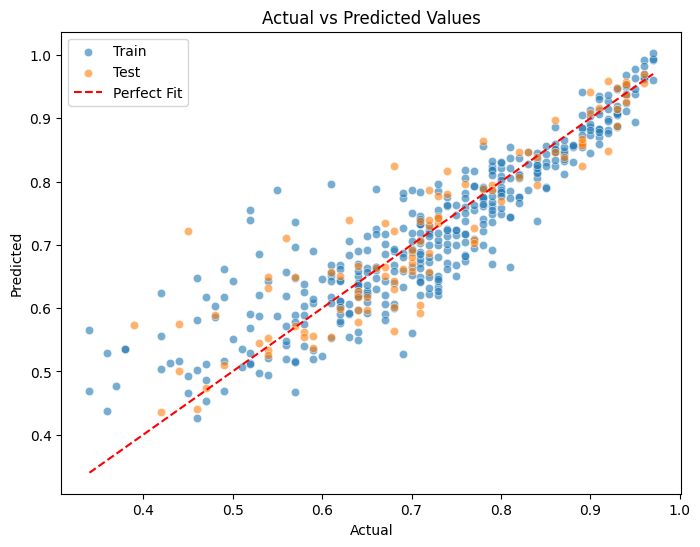

In [ ]:
# plt.figure(figsize=(8,6))
# sns.scatterplot(x=y_train, y=predictions_train, label='Train', alpha=0.6)
# sns.scatterplot(x=y_test, y=predictions_test, label='Test', alpha=0.6)

# # Add ideal reference line (y = x)
# plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'r--', label='Perfect Fit')

# plt.xlabel("Actual")
# plt.ylabel("Predicted")
# plt.title("Actual vs Predicted Values")
# plt.legend()
# plt.show()

Conclusion:-

Most points lie close to the red line, indicating good model performance.

There is no major deviation between train and test points — suggesting no overfitting.

Slight scatter around the line is normal due to prediction error.

No systematic pattern or skew is observed — predictions are balanced.



In [ ]:
# coefficients = model.coef_

# # Combine with column names
# feature_importance = pd.DataFrame({
#     'Feature': X.columns,
#     'Coefficient': coefficients
# })

# # Sort by absolute value to see impact
# feature_importance['Abs_Coefficient'] = feature_importance['Coefficient'].abs()
# feature_importance.sort_values(by='Abs_Coefficient', ascending=False, inplace=True)

# print(feature_importance[['Feature', 'Coefficient']])

             Feature  Coefficient
5               CGPA     0.067581
0          GRE Score     0.026671
1        TOEFL Score     0.018226
4               LOR      0.015866
6           Research     0.011940
2  University Rating     0.002940
3                SOP     0.001788


In [ ]:
# from statsmodels.stats.outliers_influence import variance_inflation_factor
# X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X_train.columns)

# vif_data = pd.DataFrame()
# vif_data["Feature"] = X_train_scaled_df.columns
# vif_data["VIF"] = [variance_inflation_factor(X_train_scaled_df.values, i)
#                    for i in range(X_train_scaled_df.shape[1])]

# print(vif_data)

             Feature       VIF
0          GRE Score  4.489983
1        TOEFL Score  3.664298
2  University Rating  2.572110
3                SOP  2.785764
4               LOR   1.977698
5               CGPA  4.654540
6           Research  1.518065


VIF Values

nORAMILITY

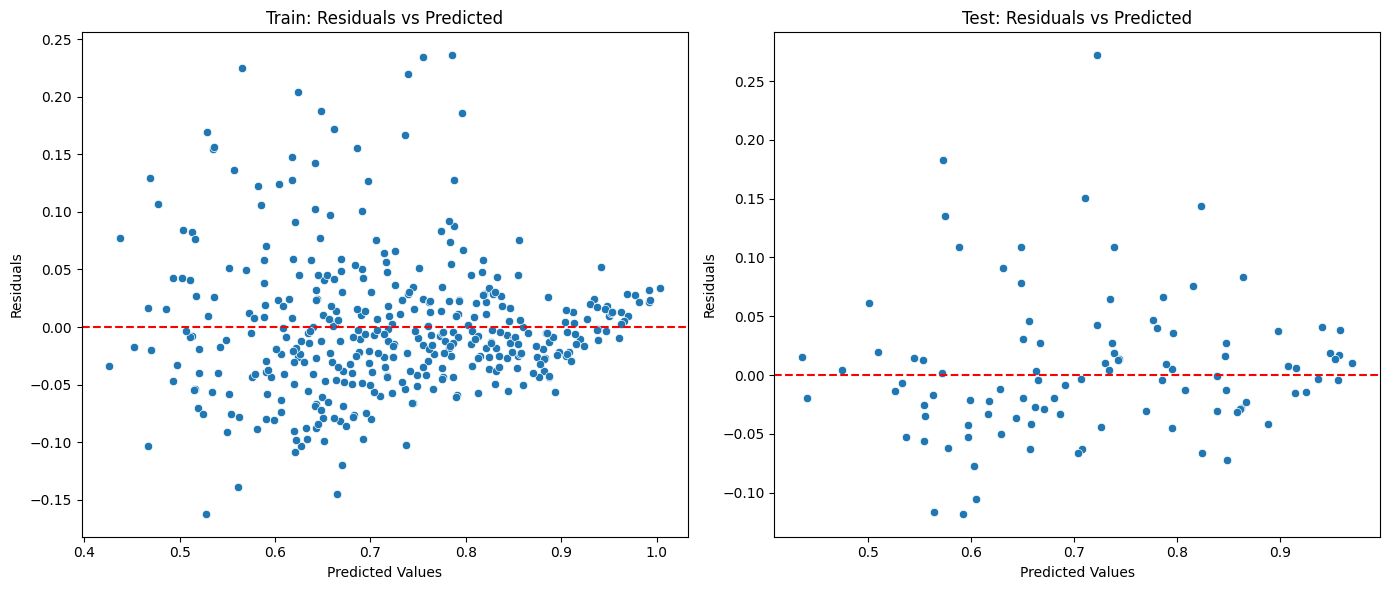

In [ ]:
# # Calculate residuals
# residuals_train = predictions_train - y_train
# residuals_test = predictions_test - y_test

# # Create subplots
# fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# # Training residuals plot
# sns.scatterplot(x=predictions_train, y=residuals_train, ax=axes[0])
# axes[0].axhline(0, color='red', linestyle='--')
# axes[0].set_title("Train: Residuals vs Predicted")
# axes[0].set_xlabel("Predicted Values")
# axes[0].set_ylabel("Residuals")

# # Testing residuals plot
# sns.scatterplot(x=predictions_test, y=residuals_test, ax=axes[1])
# axes[1].axhline(0, color='red', linestyle='--')
# axes[1].set_title("Test: Residuals vs Predicted")
# axes[1].set_xlabel("Predicted Values")
# axes[1].set_ylabel("Residuals")

# # Show the plot
# plt.tight_layout()
# plt.show()

We can see that the variance of the residuals is constant across all levels of the independent variable(s), potentially indicating a supporting the homoscedasticity assumption in linear regression.

Using Model by Giving Input

In [ ]:
# import numpy as np

# # Your input
# my_data = np.array([[337, 148, 2, 2.0, 3.0, 8.21, 1]])

# # Scale it using the existing scaler
# my_data_scaled = scaler.transform(my_data)

# # Predict
# prediction = model.predict(my_data_scaled)

# print(f"Chance of Admit: {prediction[0]:.2f}")

Chance of Admit: 0.85


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


# Polynomial Regression

In [ ]:
df

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...
495,332,108,5,4.5,4.0,9.02,1,0.87
496,337,117,5,5.0,5.0,9.87,1,0.96
497,330,120,5,4.5,5.0,9.56,1,0.93
498,312,103,4,4.0,5.0,8.43,0,0.73


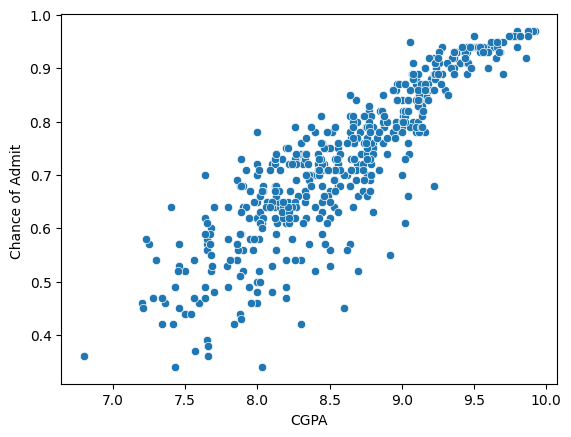

In [ ]:
sns.scatterplot(data=df,x='CGPA',y='Chance of Admit ')
plt.show()

In [38]:
# from sklearn.preprocessing import PolynomialFeatures
# poly=PolynomialFeatures(2)
# x_ploy_train=poly.fit_transform(X_train)
# x_poly_test=poly.transform(X_test)

This code increases the feature space to allow a Linear Regression model to fit non-linear patterns.

Degree is 2

In [ ]:
# from sklearn.preprocessing import StandardScaler
# scaler1=StandardScaler()
# x_poly_train_scaled=scaler1.fit_transform(x_ploy_train)
# x_poly_test_scaled=scaler1.transform(x_poly_test)

Doing Standarizatoion of Dataset

In [31]:
# import sklearn.linear_model as lm
# model1=lm.LinearRegression()
# model1.fit(x_poly_train_scaled,y_train)

In [73]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import LinearRegression

pipe= Pipeline([
    ('poly', PolynomialFeatures(degree=2)),
    ('scaler', StandardScaler()),
    ('model', LinearRegression())
])

pipe.fit(X_train, y_train)

y_pred = pipe.predict(X_test)

In [74]:
pipe.score(X_test, y_test)


0.8265115552643361

In [75]:
import pickle

# Save the trained pipeline to a file
with open('Polynomial_pipeline.pkl', 'wb') as f:
    pickle.dump(pipeline, f)

Implenting Polynomial Regression .

In [ ]:
# model1.score(x_poly_train_scaled,y_train)

0.8357962945524069

In [ ]:
# model1.score(x_poly_test_scaled,y_test)

0.8265115552643361

In [ ]:
# from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# # Predict on train and test data
# predictions_train = model1.predict(x_poly_train_scaled)
# predictions_test = model1.predict(x_poly_test_scaled)

# # ---------------- Train Metrics ----------------
# mae_train = mean_absolute_error(y_train, predictions_train)
# mse_train = mean_squared_error(y_train, predictions_train)
# r2_train = r2_score(y_train, predictions_train)

# print("Train Data Metrics:")
# print("MAE:", mae_train)
# print("MSE:", mse_train)
# print("R² Score:", r2_train)
# print("*" * 50)

# # ---------------- Test Metrics ----------------
# mae_test = mean_absolute_error(y_test, predictions_test)
# mse_test = mean_squared_error(y_test, predictions_test)
# r2_test = r2_score(y_test, predictions_test)

# print("Test Data Metrics:")
# print("MAE:", mae_test)
# print("MSE:", mse_test)
# print("R² Score:", r2_test)
# print("*" * 50)


Train Data Metrics:
MAE: 0.04004455671536485
MSE: 0.0032362611713723155
R² Score: 0.8357962945524069
**************************************************
Test Data Metrics:
MAE: 0.040565639521672754
MSE: 0.003547838694844329
R² Score: 0.8265115552643361
**************************************************


The train and test scores are close → ✅ Your model is not overfitting.

The R² scores > 0.80 → ✅ This is strong performance.

MAE is low → ✅ The model's predictions are accurate and reliable.

Trying regularization (Ridge/Lasso)  increase polynomial degree.

In [ ]:
from sklearn.linear_model import Ridge, Lasso
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


In [ ]:
# Ridge Regression
ridge_model = Ridge(alpha=1.0)  # You can tune alpha
ridge_model.fit(x_poly_train_scaled, y_train)

# Lasso Regression
lasso_model = Lasso(alpha=0.01, max_iter=10000)  # Adjust alpha as needed
lasso_model.fit(x_poly_train_scaled, y_train)


Lasso(alpha=0.01, max_iter=10000)

In [76]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import Ridge, Lasso
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import LinearRegression

pipe1= Pipeline([
    ('poly', PolynomialFeatures(degree=2)),
    ('scaler', StandardScaler()),
    ('model', Ridge())
])

pipe1.fit(X_train, y_train)

y_pred = pipe1.predict(X_test)

In [77]:
pipe1.score(X_test, y_test)

0.8297538847433543

In [81]:
with open('Ridge_pipeline.pkl', 'wb') as f:
    pickle.dump(pipeline, f)

In [ ]:
def evaluate_model(name, y_train, train_preds, y_test, test_preds):
    print(f"==== {name} Regression ====")
    print("Train Metrics:")
    print("MAE:", mean_absolute_error(y_train, train_preds))
    print("MSE:", mean_squared_error(y_train, train_preds))
    print("R² Score:", r2_score(y_train, train_preds))
    print("-" * 50)
    print("Test Metrics:")
    print("MAE:", mean_absolute_error(y_test, test_preds))
    print("MSE:", mean_squared_error(y_test, test_preds))
    print("R² Score:", r2_score(y_test, test_preds))
    print("=" * 50)

evaluate_model("Ridge", y_train, ridge_train_preds, y_test, ridge_test_preds)
evaluate_model("Lasso", y_train, lasso_train_preds, y_test, lasso_test_preds)


==== Ridge Regression ====
Train Metrics:
MAE: 0.04105589899997406
MSE: 0.003361734957223934
R² Score: 0.8294299169696493
--------------------------------------------------
Test Metrics:
MAE: 0.04117257556699609
MSE: 0.0034815330569984045
R² Score: 0.8297538847433543
==== Lasso Regression ====
Train Metrics:
MAE: 0.04351398467767011
MSE: 0.003685977046401885
R² Score: 0.8129782928003578
--------------------------------------------------
Test Metrics:
MAE: 0.042415133663594194
MSE: 0.0037120011439001873
R² Score: 0.8184840516430227


🔷 Ridge Regression:
Train R² Score: 0.8294

Test R² Score: 0.8298

MAE (Test): 0.0411

MSE (Test): 0.00348

🟢 Interpretation:

The Ridge model performs consistently well on both train and test sets.

Minimal difference between train and test scores suggests good generalization.

Ridge helps control overfitting slightly better than standard Polynomial Linear Regression.

🔷 Lasso Regression:
Train R² Score: 0.8129

Test R² Score: 0.8184

MAE (Test): 0.0424

MSE (Test): 0.00373

🟡 Interpretation:

Lasso performs slightly worse than Ridge in terms of R² and error metrics.

Lasso also performs reasonably well, but may eliminate some features, which can slightly reduce accuracy while simplifying the model.

Good option when you suspect irrelevant or less important features.

📌 Final Conclusion:
Both Ridge and Lasso help prevent overfitting in polynomial regression.

Ridge Regression is slightly better in this case based on the R² score and lower test errors.

If interpretability or feature selection is a goal, Lasso may still be preferred.

# Regularization

In [ ]:
alpha_values = [0.001,0.1, 0.01, 1.0, 10.0, 100.0]  # Add more values as needed
r2_score_l = []

for alpha in alpha_values:

    ridge_model = Ridge(alpha=alpha)

    ridge_model.fit(X_train, y_train)

    y_pred = ridge_model.predict(X_test)

    r2 = r2_score(y_test, y_pred)
    r2_score_l.append(r2)
    print(f"Alpha = {alpha}, R-squared score: {r2}")
r2_score_l = np.array(r2_score_l)
print('*'*75)
print('Max Accuracy at : ',alpha_values[np.argmax(r2_score_l)],'with Accuracy: ',max(r2_score_l)*100)

Alpha = 0.001, R-squared score: 0.8188424126432435
Alpha = 0.1, R-squared score: 0.8187586282455803
Alpha = 0.01, R-squared score: 0.8188348134172784
Alpha = 1.0, R-squared score: 0.8179793486575073
Alpha = 10.0, R-squared score: 0.8096059577714889
Alpha = 100.0, R-squared score: 0.765894103157108
***************************************************************************
Max Accuracy at :  0.001 with Accuracy:  81.88424126432436


Insights about model:

We can say that CGPA has most weight for predicting the chance of admit to IVY league college.

Second most important feature is Total Score (GRE Score + TOEFL Score) which helps in predicting the chance of Admit to IVY league college.

Ridge Model gives us the best Model with Accuracy of 81.7368 %

Significance of Predictions:¶
1. Academic Excellence:

The model places a significant emphasis on CGPA, highlighting the importance of academic excellence in influencing the chance of admission to Ivy League colleges.

2. Holistic Evaluation:

The inclusion of features such as SOP_LOR and Research Experience underscores the model's consideration of a holistic evaluation, beyond academic achievements.

3. Strategic Planning:

Prospective applicants can use the predictions to strategically plan and strengthen areas that contribute most to their chance of admission.

4. Insights for Admissions Committees:

Admissions committees can benefit from insights into the relative importance of different factors when evaluating applicants.